### Importing necessary libraries

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Importing necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
%matplotlib inline

### Reading Dataset

In [36]:
# reading dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


### Checking Statistical Summary of data

In [37]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Checking Data type, null values & shape of dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Dropping irrelevant columns

In [39]:
# Dropping 'Market Category' column since it has most null values that cannot be replaced
# and removing all null rows can degrade the dataset
df1 = df.drop(columns=['Market Category'],axis=1)

### Renaming column names

In [40]:
# Renaming column names
column_dict = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode",                "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"}

df1.rename(columns=column_dict,inplace=True)
df1.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


### Removing null and duplicate values

In [41]:
# Dropping duplicate and null values and checking row count
df1 = df1.dropna()
df1 = df1.drop_duplicates(subset=df1.columns,keep='first')

### Plotting graphs to check for outliers

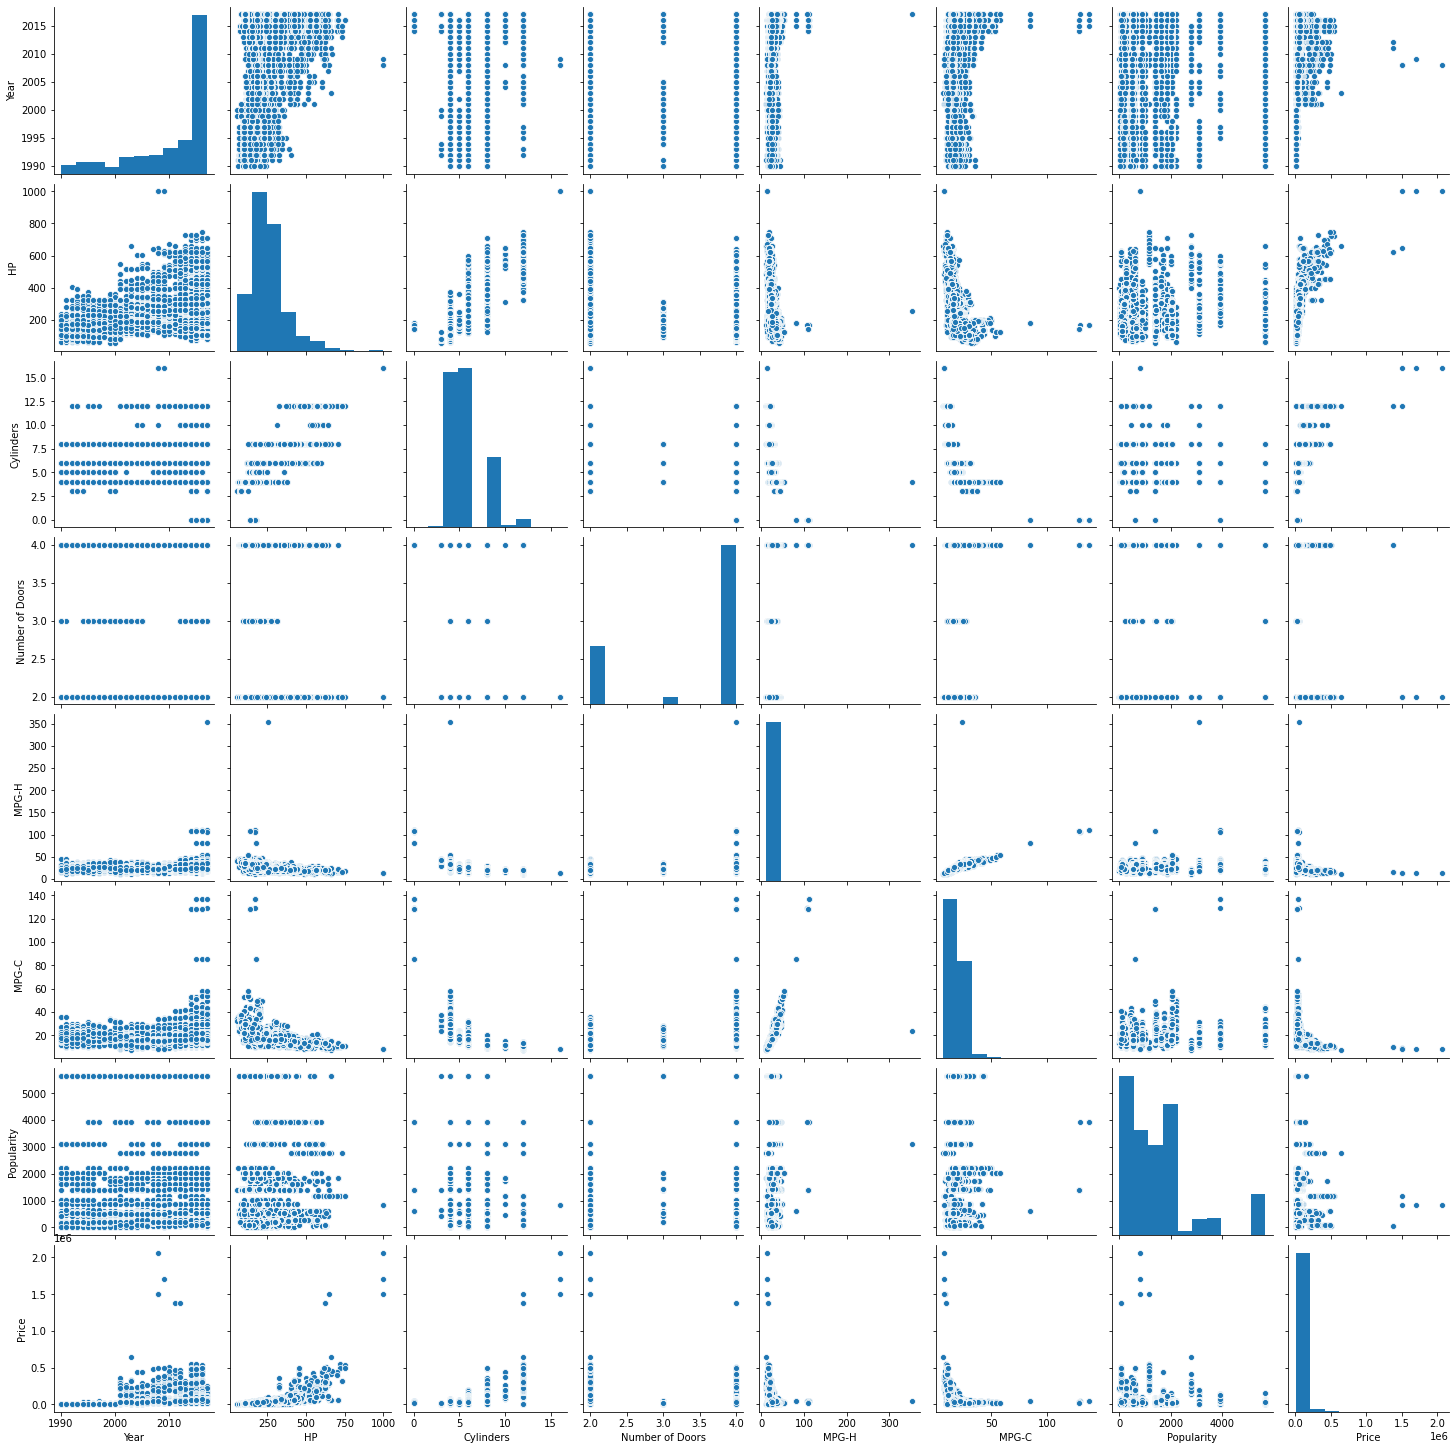

In [42]:
sns.pairplot(df1)

### Removing outliers

In [43]:
# Finding IQR
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
print(IQR)

# Removing Outliers
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5*IQR))).any(axis=1)]

Year                   9.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
Price              21485.0
dtype: float64


### Finding the most represented car brand

In [44]:
# Most represented car brand
car_mode = df1['Make'].mode()
print(car_mode)

0    Chevrolet
dtype: object


### Finding the average price of the top car brand

In [45]:
# Average Price of top car brand
top_make_avg = df1[df1['Popularity']==df1['Popularity'].max()]
print(top_make_avg['Make'].iloc[0],'\t',top_make_avg['Price'].mean())

BMW 	 48111.880733944956


### Creating Correlation matrix

In [46]:
#Correlation Matrix
correlation = df1.corr()
correlation

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330621,-0.094479,0.241078,0.359886,0.323710,0.204668,0.591834
HP,0.330621,1.000000,0.740964,0.044248,-0.465232,-0.563260,0.105776,0.743476
Cylinders,-0.094479,0.740964,1.000000,0.024115,-0.697892,-0.750855,0.025742,0.391990
Number of Doors,0.241078,0.044248,0.024115,1.000000,0.004763,0.021714,-0.073779,0.130505
MPG-H,0.359886,-0.465232,-0.697892,0.004763,1.000000,0.937939,0.080936,-0.127598
MPG-C,0.323710,-0.563260,-0.750855,0.021714,0.937939,1.000000,0.070418,-0.202185
Popularity,0.204668,0.105776,0.025742,-0.073779,0.080936,0.070418,1.000000,0.116907
Price,0.591834,0.743476,0.391990,0.130505,-0.127598,-0.202185,0.116907,1.000000


#### Most correlated columns are: MPG-C and MPG-H, HP and Cylinders
#### Least correlated columns: Cylinders and MPG-C, Cylinders and MPG-H

### Plotting Correlation matrix

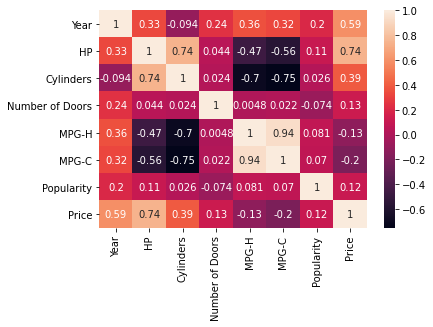

In [47]:
# Plotting Correlation Matrix
sns.heatmap(correlation,annot=True)

### Performing EDA

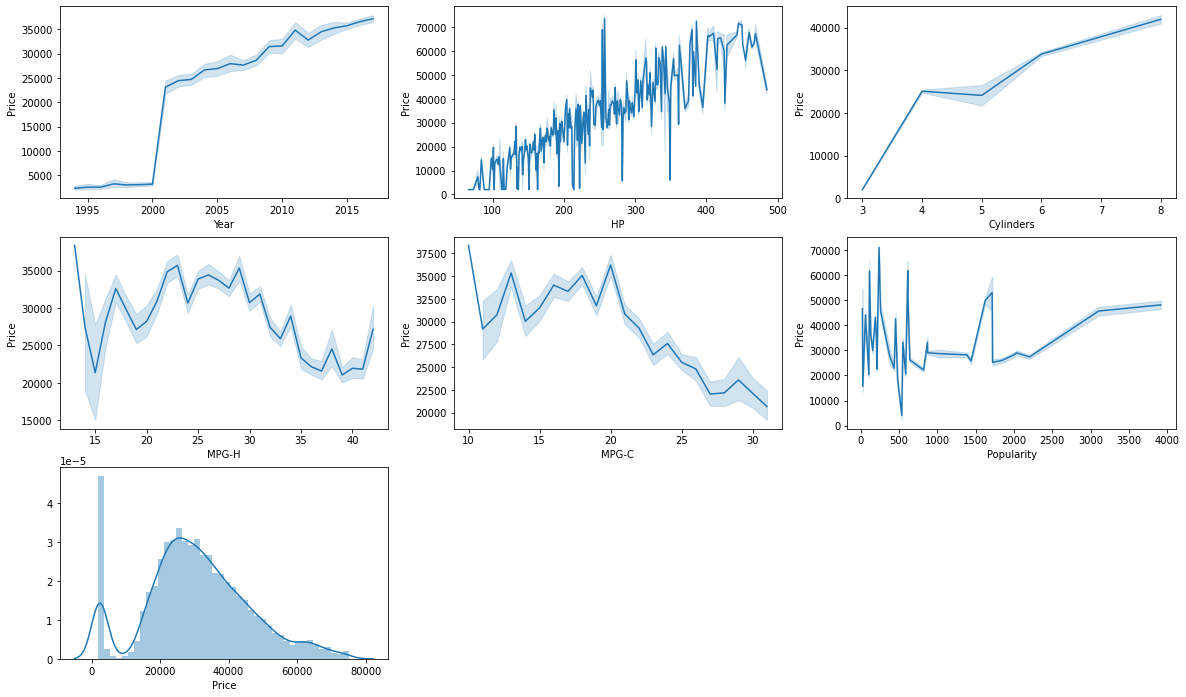

In [48]:
# EDA of Dataset
f = plt.figure(figsize=(20, 12))
gs = f.add_gridspec(3, 3)

ax = f.add_subplot(gs[0, 0])
sns.lineplot(y=df1['Price'],x=df1['Year'])

ax = f.add_subplot(gs[0, 1])
sns.lineplot(y=df1['Price'],x=df1['HP'])

ax = f.add_subplot(gs[0, 2])
sns.lineplot(y=df1['Price'],x=df1['Cylinders'])

ax = f.add_subplot(gs[1, 0])
sns.lineplot(y=df1['Price'],x=df1['MPG-H'])

ax = f.add_subplot(gs[1, 1])
sns.lineplot(y=df1['Price'],x=df1['MPG-C'])

ax = f.add_subplot(gs[1, 2])
sns.lineplot(y=df1['Price'],x=df1['Popularity'])

ax = f.add_subplot(gs[2, 0])
sns.distplot(df1['Price'])

#### From the above EDA we can see that:
1.) There is a sudden price hike after the year 2000 and it keeps on increasing

2.) Price is directly proportional to Cylinders

3.) There is constant rise in Price vs HP trend

### Label Encoding the columns

In [49]:
# Encoding non-number based columns
dfc = df1.select_dtypes(exclude=[np.number]).columns
encoder = LabelEncoder()
for i in dfc:
    df1[i] = encoder.fit_transform(df1[i])
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,6,335.0,6.0,2,3,2.0,0,8,26,19,3916,46135
1,3,0,2011,6,300.0,6.0,2,3,2.0,0,6,28,19,3916,40650
2,3,0,2011,6,300.0,6.0,2,3,2.0,0,8,28,20,3916,36350
3,3,0,2011,6,230.0,6.0,2,3,2.0,0,8,28,18,3916,29450
4,3,0,2011,6,230.0,6.0,2,3,2.0,0,6,28,18,3916,34500


### Statistical summary of the dataset after Label Encoding

In [50]:
df1.describe()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
count,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000,8609.000000
mean,17.835289,324.185155,2011.299919,6.172262,235.662098,5.392612,1.187246,1.706470,3.541062,0.997561,8.297131,26.673365,19.427227,1210.180160,30992.557556
std,11.509928,195.961261,6.303927,1.396754,77.711522,1.388723,0.475242,1.063354,0.826331,0.887160,4.931971,5.680417,4.350585,864.203659,15160.555730
min,0.000000,0.000000,1994.000000,0.000000,66.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,13.000000,10.000000,21.000000,2000.000000
25%,6.000000,142.000000,2008.000000,6.000000,172.000000,4.000000,1.000000,1.000000,4.000000,0.000000,3.000000,23.000000,16.000000,549.000000,21935.000000
50%,16.000000,317.000000,2015.000000,7.000000,230.000000,6.000000,1.000000,2.000000,4.000000,1.000000,9.000000,26.000000,19.000000,1013.000000,29970.000000
75%,28.000000,521.000000,2016.000000,7.000000,290.000000,6.000000,1.000000,2.000000,4.000000,2.000000,14.000000,31.000000,22.000000,1851.000000,39995.000000
max,36.000000,645.000000,2017.000000,7.000000,485.000000,8.000000,3.000000,3.000000,4.000000,2.000000,15.000000,42.000000,31.000000,3916.000000,75200.000000


### Divding dataset into Feature variables and Target variable

In [51]:
X = df1[['Make','Model','Year','HP','Cylinders','Transmission','Drive Mode','Number of Doors','Engine Fuel Type','Vehicle Size','Vehicle Style','MPG-H','MPG-C','Popularity']]
y = df1['Price']

### Splitting the dataset into 80 and 20 ratio for training and test datasets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training Linear Regression model using train data, making predictions using test data and checking accuracy

In [53]:
# training model
regression = LinearRegression(normalize=True).fit(X_train,y_train)
predictions = regression.predict(X_test)
regression.score(X_test,y_test)

0.7076952879129818

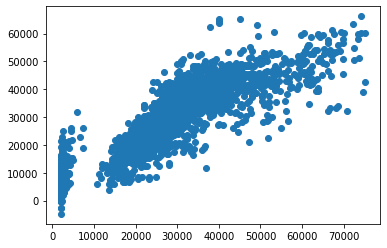

In [54]:
# plotting predictions
plt.scatter(y_test,predictions)

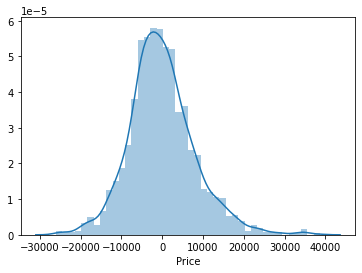

In [55]:
sns.distplot(y_test-predictions)

### Checking model performance over various metrics

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score:', metrics.r2_score(y_test,predictions))

MAE: 6130.466246325484
MSE: 66291833.465717986
RMSE: 8141.979701873371
R2 score: 0.7076952879129818


### Transforming feature variables using PolynomialFeatures, splitting into 80 and 20 ratio and fitting it again in a LinearRegression model, making predictions and checking model accuracy

In [57]:
# Transforming data using PolynomialFeatures
poly_Fea = PolynomialFeatures(degree=2)
X_poly = poly_Fea.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,test_size=0.2,random_state=101)
lin_regression = LinearRegression().fit(X_train, y_train)
predict = lin_regression.predict(X_test)
lin_regression.score(X_test,y_test)

0.8017895389499985

### PolynomialFeatures often lead to model overfitting, hence, using Ridge model to regularize model overfitting

In [58]:
# Ridge to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,test_size=0.2,random_state = 101)
lin_regression = Ridge().fit(X_train, y_train)
predict = lin_regression.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.57218e-18): result may not be accurate.
  overwrite_a=True).T


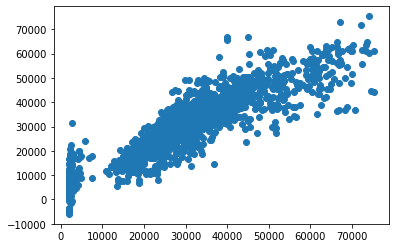

In [59]:
plt.scatter(y_test,predict)

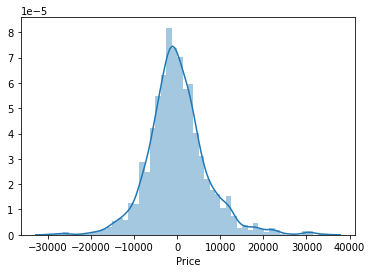

In [60]:
sns.distplot(y_test-predict)

### Checking model performance over various metrics

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('R2 score:', metrics.r2_score(y_test,predict))

MAE: 5009.217168657994
MSE: 47401853.505212285
RMSE: 6884.90039907712
R2 score: 0.7909880536280921


### Training RandomForest Regressor model using train data, making predictions using test data and checking accuracy

In [62]:
RF = RandomForestRegressor(n_estimators = 300, random_state = 101)
RF.fit(X_train, y_train)
predict = RF.predict(X_test)

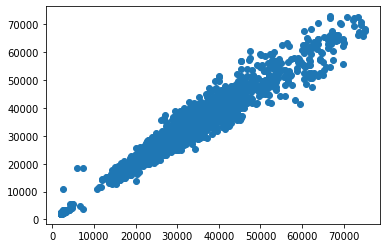

In [63]:
plt.scatter(y_test,predict)

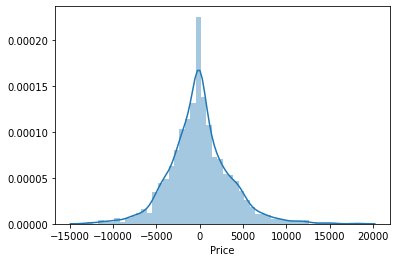

In [64]:
sns.distplot(y_test-predict)

### Checking model performance over various metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('R2 score:', metrics.r2_score(y_test,predict))

MAE: 2533.7550249890196
MSE: 12346350.317242801
RMSE: 3513.7373716945326
R2 score: 0.9455604682185563
